# Исследование объявлений о продаже квартир

Цель: Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Оглавление: 
1. [Ознакомление с данными](#start)
      - [Вывод](#result1)
2. [Предобработка данных](#clean)
    - [анализ `total_images`](#total_images)
    - [анализ `last_price`](#last_price)
    - [анализ `total_area`](#total_area)
    - [анализ `first_day_exposition`](#first_day_exposition)
    - [анализ `rooms`](#rooms)
    - [анализ `ceiling_height`](#ceiling_height)
    - [анализ `floors_total`](#floors_total)
    - [анализ `living_area`](#living_area)
    - [анализ `is_apartment`& `balcony`](#is_apartment)
    - [анализ `kitchen_area`](#kitchen_area)
    - [анализ `locality_name`](#locality_name)
    - [анализ `days_exposition`](#days_exposition)
      - [Вывод](#result2)
3. [Расчет дополнительных данных](#dopdata)
      - [Вывод](#result3)
4. [Исследовательский анализ данных и выявление взаимосвязи с целевой переменной:](#research)
    - [Анализ площади, цены, числа комнат, высоты потолков](#research1)
       - [Вывод](#result4)
    - [Анализ времени продаж](#research2)
       - [Вывод](#result5)
    - [Определение редких и выбивающихся значений](#research3)
       - [Вывод](#result6)
    - [Установление факторов влияющих на стоимость квартиры](#research4)
       - [Вывод](#result7)
    - [Определение максимальной и минимальной стоимости жилья в Топ-10 населённых пунктов с наибольшим числом объявлений](#research5)
       - [Вывод](#result8)
    - [Определение границ центральной зоны Питера](#research6)
       - [Вывод](#result9)
    - [Сравнение центра Санкт-Петербурга и города в целом](#research7)
       - [Вывод](#result10)
5. [Общий вывод](#total_result)

Цель проекта: Установить факторы влияющие на стоимость квартиры в пределах Санкт-Петербурга и в пригороде.

### Шаг 1. Ознакомление с датасетом<a id="start"></a>

In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


### Вывод<a id="result1"></a>
1. Датасет  содержит 22 колонки и 23699 строк;
2. Два столбца имеют булев тип данных `studio`, `open_plan`, апартаменты нужно привести к булеву типу и заменить все пропуски на 0;
3. `first_day_exposition`привести к типу данных datatime;
4. Для удобства исследования большинство данных необходимо округлить и привести к типу данных int64;
5. Пропуски имеют следующие столбцы:
    - `ceiling_height` - данные нужны для исследования, пропуски необходимо заполнить медианными значениями, т.к. норматив В РФ 2,4 - 2,8 м., значения меньше 2,4 м и больше 2,8 рассмотрим отдельно;
    - `floors_total` - данные для исследования нужны, но заполнять пропуски в этом столбце черевато перекосами (7 этаж в 3 этажном доме), при анализе попытаемся заполнить с условием;
    - `living_area` - пропуски заполним медианой на основании завиимости от общей площади и кол-ва комнат (за основу возьмем - 3-ю улицу Строителей, дом 25, квартира 12 "Ирония судьбы");
    - `is_apartment` - NaN заменим на 0, проверим уникальные значения;
    - `kitchen_area` - пропуски заполним медианой на основании завиимости от общей площади и жилой площади (за основу также возьмем - 3-ю улицу Строителей, дом 25, квартира 12 "Ирония судьбы");
    - `balcony` - заменим пропуски 0, т.к. пользователь скорее всего пропускал пункт, если у него нет балкона;
    - `locality_name`  - пропусков всего 49 шт, посмотим позже, что сможем с ними сделать, но менять на Лондон точно не будем.
    - `airports_nearest` - скорее всего пропуски связаны с отсутствием аэропортов в ближайшей отдаленности, оставим без изменения;
    - `cityCenters_nearest` - заполнить пропуски не сможем, и скорее всего не нужно, т.к. пропуски в населенных пунктах отличных от СПБ.;
    - `parks_around3000` - заполнить пропуски не сможем, и скорее всего не нужно, т.к. пропуски в населенных пунктах отличных от СПБ.;
    - `parks_nearest` - заполнить пропуски не сможем;
    - `ponds_around3000` - заполнять пропуски нет необходимости, т.к. пропущенные значения находятся не в СПБ;
    - `ponds_nearest` - заполнить пропуски не сможем.
    - `days_exposition` - пропуски связаны с отсутствием информации о конечной продаже, либо системная ошибка, качественно заполнить пропуски не получится.
6. Аномальные значения:
    - `last_price` - 12900 и 763 млн. - видимо кто-то продает сарай, а кто-то комнату в Эрмитаже, но их нельзя использовать в исследовании, т.к. они создали разницу медианы и среднего около 2 млн. руб;
    - `total_area` - 900 кв.м. - скорее всего тот же дворец, но на него посмотрим в следующем разделе;
    - `rooms` - 0 и 19 комнат, сразу задаемся вопросом: "Что продают?" в первом точно сарай или туалет, во втором **Эрмитаж.query('Этаж == 2')**.
    - `ceiling_height` - 1 и 100 м, 1 м высота - потолка еще можно поверить, если смотрели "Властелин колец", но вот 100 м, тут либо ошибка, либо  это недвижимость в Дубае. Норматив В РФ 2,4 - 2,8 м., значения меньше 2,4 м и больше 2,8 рассмотрим отдельно;
    - `floors_total` - 60 этажей - возможно;
    - `living_area` - 2 и 409 квм. две проблемы: в первом случае - **как жить?**, во втором случае - **как вымыть все полы?**;
    - `kitchen_area` - ситуация аналогичная, все то же неравенство доходов;
    - остальные значения взяты с геоданных.

### Шаг 2. Предобработка данных<a id="clean"></a>

Проведем анализ каждого столбца:
- Есть ли сортировка по какому-то признаку;
- Что означает каждый столбец;
- Есть ли пропуски в столбцах и как они появились.
- Выберем вариант барьбы с пропусками (заменим пропуски медианными значениями, либо 0, либо не тронем);
- Нужно ли делить на категории, менять тип данных;

Начнем со столбца `total_images`<a id="total_images"></a>:
1. Сортировки - нет;
2. Означает - кол-во фото в объявлении, чем больше фото, тем проще покупателю решить покупать или нет квартиру, данный показатель может сильно влиять на скорость продажи квартиры;

In [ ]:
df['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64

3. Пропусков нет, есть 0 значение, но оно обозначет, что фото нет;
4. Тип данных не меняем;

Столбец `last_price`<a id="last_price"></a> - целевая переменная:
- Есть ли сортировка - нет;
- Столбец означает цену продажи;
- Нет пропусков;
- Округлим и поменяем на int64 для удобства в дальнейшем исследовании;

In [ ]:
df['last_price'].round(0).astype('Int64')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: Int64

Столбец `total_area`<a id="total_area"></a>:
- Есть ли сортировка по какому-то признаку - нет;
- `total_area` - общая площадь продаваемого жилья, основная переменная, от которой может зависить цена, жилая площадь, площадь кухни, кол-во комнат;
- Пропусков нет.
- Нужно поделить на группы, округлить, поменять тип данных на int64 для удобства анализа;

In [ ]:
# создали новый столбец с группами по общей площади
df['group_total_area'] = pd.cut(df['total_area'],[0,30,40,50,60,70,80,100,300,900])

In [ ]:
# df['group_total_area'].value_counts() # проверли

Столбец `first_day_exposition`<a id="first_day_exposition"></a>:
- Приведем к типу данных datatime

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Столбец `rooms`<a id="rooms"></a>:
- Есть ли сортировка по какому-то признаку - нет;
- `rooms` - количество комнат, также оказывает влияние на цену и жилую площадь;
- Пропусков нет, но есть 0 значения.

In [ ]:
df['rooms'].value_counts() # проверили

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [ ]:
df['rooms'] = df['rooms'].replace(0, np.nan) # поменяли 0 на NaN

In [ ]:
# Заменили rooms = NaN, на кол-во комнат соответствующие общей площади
mapper = df.groupby("group_total_area")['rooms'].median().to_dict()
 
def mean_rooms(row):
    if np.isnan(row['rooms']):
        return mapper.get((row["group_total_area"]))
    return row['rooms']
 
df['rooms'] = df.apply(mean_rooms, axis=1)

In [ ]:
df['rooms'].value_counts() # проверяем, большая часть перешла в 1-ушки.

1.00     8235
2.00     7945
3.00     5817
4.00     1180
5.00      326
6.00      106
7.00       59
8.00       12
9.00        8
10.00       3
11.00       2
14.00       2
15.00       1
19.00       1
12.00       1
16.00       1
Name: rooms, dtype: int64

Столбец `ceiling_height`<a id="ceiling_height"></a>:
- Есть ли сортировка по какому-то признаку - нет;
- `ceiling_height` - высота потолка;
- Пропуски заменим медианным значением, среднее не подойдет, т.к. в данных есть аномальное значение в 100 м, посмотрим на аномальные значения;

In [ ]:
df.loc[pd.isnull(df['ceiling_height'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_total_area
1,7,3350000.00,40.40,2018-12-04,1.00,nan,11.00,18.60,1,NaN,...,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00,"(40, 50]"
2,10,5196000.00,56.00,2015-08-20,2.00,nan,5.00,34.30,4,NaN,...,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,"(50, 60]"
3,0,64900000.00,159.00,2015-07-24,3.00,nan,14.00,nan,9,NaN,...,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,"(100, 300]"
5,10,2890000.00,30.40,2018-09-10,1.00,nan,12.00,14.40,5,NaN,...,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00,"(30, 40]"
6,6,3700000.00,37.30,2017-11-02,1.00,nan,26.00,10.60,6,NaN,...,1.00,посёлок Парголово,52996.00,19143.00,0.00,nan,0.00,nan,155.00,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.00,39.00,2017-12-16,1.00,nan,9.00,20.00,6,NaN,...,2.00,Санкт-Петербург,40837.00,16704.00,0.00,nan,0.00,nan,38.00,"(30, 40]"
23690,3,5500000.00,52.00,2018-07-19,2.00,nan,5.00,31.00,2,NaN,...,nan,Санкт-Петербург,20151.00,6263.00,1.00,300.00,0.00,nan,15.00,"(50, 60]"
23692,2,1350000.00,30.00,2017-07-07,1.00,nan,5.00,17.50,4,NaN,...,nan,Тихвин,nan,nan,nan,nan,nan,nan,413.00,"(0, 30]"
23695,14,3100000.00,59.00,2018-01-15,3.00,nan,5.00,38.00,4,NaN,...,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00,"(50, 60]"


In [ ]:
# заменим пропуски nan медианным значением потолка в зависимости от общей площади.
group_ceiling_height = df.groupby('group_total_area')
df['ceiling_height'] = group_ceiling_height.ceiling_height.apply(lambda x: x.fillna(x.median()))

In [ ]:
df.loc[pd.isnull(df['ceiling_height'])] # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_total_area


In [ ]:
df.loc[:,['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','kitchen_area']].sort_values(by='ceiling_height', ascending=False).head(40)

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area
22869,15000000.00,25.00,1.00,100.00,5.00,14.00,5,11.00
22336,9999000.00,92.40,2.00,32.00,6.00,55.50,5,16.50
3148,2900000.00,75.00,3.00,32.00,3.00,53.00,2,8.00
21377,4900000.00,42.00,1.00,27.50,24.00,37.70,19,11.00
22938,4000000.00,98.00,4.00,27.00,2.00,73.00,2,9.00
5246,2500000.00,54.00,2.00,27.00,5.00,30.00,3,9.00
21824,2450000.00,44.00,2.00,27.00,2.00,38.00,2,8.60
10773,3800000.00,58.00,2.00,27.00,10.00,30.10,3,8.10
4876,3000000.00,25.00,1.00,27.00,25.00,17.00,17,nan
5807,8150000.00,80.00,2.00,27.00,36.00,41.00,13,12.00


Высота потолка с 22,6 по 32.00 - это скорее всего ошибка запятой, т.к. логично предположить 2.26, и 3,2 метра, свыше 5 метров - это царские палаты, или ангары, их из выборки нужно убрать в следующих разделах.

In [ ]:
df['ceiling_height'] = df['ceiling_height'].replace(22.6, 2.26)
df['ceiling_height'] = df['ceiling_height'].replace(24, 2.4)
df['ceiling_height'] = df['ceiling_height'].replace(25, 2.5)
df['ceiling_height'] = df['ceiling_height'].replace(26, 2.6)
df['ceiling_height'] = df['ceiling_height'].replace(27, 2.7)
df['ceiling_height'] = df['ceiling_height'].replace(27.5, 2.75)
df['ceiling_height'] = df['ceiling_height'].replace(32, 3.2)

Столбец `floors_total`<a id="floors_total"></a>:
- Есть ли сортировка по какому-то признаку - нет;
- `floors_total` - всего этажей в доме;
- Пропуски заполним медианным значением этажа, либо значением из стобца `floor` в случае, если этажей больше, чем значения медианы;
- Информация о кол-ве этажей важна при выборе квартиры, умышленно ее не пропустишь, вероятно ошибки при выгрузке, т.к. пропусков очень мало;
- Округлим и приведем к int64.

In [ ]:
df.loc[pd.isna(df['floors_total'])] # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_total_area
186,12,11640000.00,65.20,2018-10-02,2.00,2.65,nan,30.80,4,NaN,...,nan,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,nan,49.00,"(60, 70]"
237,4,2438033.00,28.10,2016-11-23,1.00,2.60,nan,20.75,1,NaN,...,0.00,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,251.00,"(0, 30]"
457,4,9788348.00,70.80,2015-08-01,2.00,2.71,nan,38.40,12,NaN,...,0.00,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00,"(70, 80]"
671,4,6051191.00,93.60,2017-04-06,3.00,2.80,nan,47.10,8,NaN,...,0.00,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,123.00,"(80, 100]"
1757,5,3600000.00,39.00,2017-04-22,1.00,2.60,nan,nan,9,NaN,...,0.00,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.00,63.50,2017-05-24,2.00,2.80,nan,nan,3,NaN,...,nan,Санкт-Петербург,51340.00,15363.00,0.00,nan,1.00,853.00,512.00,"(60, 70]"
22656,4,4574160.00,64.50,2017-04-02,2.00,2.65,nan,31.70,20,NaN,...,0.00,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,127.00,"(60, 70]"
22808,0,14569263.00,110.40,2016-11-20,3.00,3.00,nan,45.38,6,NaN,...,0.00,Санкт-Петербург,19095.00,4529.00,0.00,nan,0.00,nan,260.00,"(100, 300]"
23590,0,21187872.00,123.30,2017-04-25,3.00,3.00,nan,50.40,18,NaN,...,0.00,Санкт-Петербург,19095.00,4529.00,0.00,nan,0.00,nan,104.00,"(100, 300]"


In [ ]:
# Определим переменнную med_floor_total
med_floor_total = df['floors_total'].median()
med_floor_total

9.0

In [ ]:
def med_fl_tl(row):
    if pd.isna(row['floors_total']) and row['floor'] >= med_floor_total:
        return row['floor']
    if pd.isna(row['floors_total']) and row['floor'] < med_floor_total:
        return med_floor_total
    return row['floors_total']
df['floors_total'] = df.apply(med_fl_tl, axis=1)

In [ ]:
df.loc[pd.isna(df['floors_total'])] # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_total_area


Столбец `living_area`<a id="living_area"></a>:
- Есть ли сортировка по какому-то признаку - нет;
- `living_area` - жилая площадь, она зависит от общей площади и кол-ва комнат;
- Пропуски заполним медианным значением в зависимости от общей площади и кол-ва комнат;
- Пропуски могли возникнут не случайно, чтобы ввести в заблуждение покупателей, либо систему определяющую цену квартиры исходя из общей площади;

In [ ]:
# Посмотрим на цифры
df.pivot_table(index=['group_total_area'], columns = 'rooms', values = 'living_area', aggfunc = 'median')

rooms,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,14.00,15.00,16.00,19.00
group_total_area,,,,,,,,,,,,,,,,
"(0, 30]",16.20,16.50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(30, 40]",17.39,24.00,nan,nan,28.60,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(40, 50]",18.60,28.20,31.00,37.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(50, 60]",21.20,31.00,39.30,43.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(60, 70]",23.30,34.50,42.60,45.65,51.20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(70, 80]",37.70,38.05,46.10,50.48,59.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(80, 100]",46.00,41.19,51.80,60.30,63.80,71.50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(100, 300]",38.60,50.00,63.00,77.00,94.80,123.27,132.00,157.50,160.60,161.40,133.90,nan,168.30,nan,180.00,nan
"(300, 900]",nan,nan,nan,248.70,187.90,196.00,250.00,181.60,189.10,nan,nan,409.70,222.00,409.00,nan,264.50


In [ ]:
# Поменяем NaN на цифры из таблицы
mapper = df.groupby(["group_total_area","rooms"])['living_area'].median().to_dict()

def mean_living_area(row):
    if np.isnan(row['living_area']):
        return mapper.get((row['group_total_area'],row['rooms']))
    return row['living_area']

df['living_area'] = df.apply(mean_living_area, axis=1)

In [ ]:
df[df['living_area'].isna()] # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_total_area
6183,10,84382000.00,363.10,2018-10-07,3.00,3.36,16.00,nan,12,NaN,...,nan,Санкт-Петербург,31887.00,4979.00,0.00,nan,2.00,182.00,nan,"(300, 900]"
9826,1,43185328.00,494.10,2017-05-12,1.00,2.85,12.00,nan,3,NaN,...,0.00,Санкт-Петербург,28529.00,6832.00,1.00,592.00,0.00,nan,5.00,"(300, 900]"


In [ ]:
# Заполним два выпавших пропуска медианным значением без учета кол-ва комнат
mapper = df.groupby("group_total_area")['living_area'].median().to_dict()

def mean_living_area(row):
    if np.isnan(row['living_area']):
        return mapper.get((row['group_total_area']))
    return row['living_area']

df['living_area'] = df.apply(mean_living_area, axis=1)

In [ ]:
df[df['living_area'].isna()] # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_total_area


In [ ]:
# создали новый столбец с группами по жилой площади
df['group_living_area'] = pd.cut(df['living_area'],[0,15,20,30,40,50,100,409])

In [ ]:
# df['group_living_area'].value_counts() # проверили

Столбцы `is_apartment` & `balcony`<a id="is_apartment"></a> очистим от NaN, заменив на соответствующие значения:

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

In [ ]:
# df['is_apartment'].value_counts() # проверка

In [ ]:
# df['balcony'].value_counts() # проверка

Столбец `kitchen_area`<a id="kitchen_area"></a>:
- Есть ли сортировка по какому-то признаку - нет;
- `kitchen_area` - площадь кухни, важная переменная, которая влияет на цену при выборе квартиры, она зависит от общей и жилой площади;
- Пропуски заполним медианным значением в зависимости от общей и жилой площади;
- Пропуски скорее всего возникли случайно, т.к. подавая объявления заполняется общая и жилая площадь, площадь кухни указывается не всегда;

In [ ]:
# Посмотрим на цифры
df.pivot_table(index=['group_total_area'], columns = 'group_living_area', values = 'kitchen_area', aggfunc = 'median')

group_living_area,"(0, 15]","(15, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 100]","(100, 409]"
group_total_area,,,,,,,
"(0, 30]",7.00,6.00,4.80,nan,nan,nan,nan
"(30, 40]",9.93,8.40,7.50,9.30,nan,nan,nan
"(40, 50]",16.00,11.10,7.00,6.00,6.00,nan,nan
"(50, 60]",21.90,15.05,10.00,8.30,6.00,7.10,nan
"(60, 70]",41.00,22.50,14.00,11.00,8.00,7.25,nan
"(70, 80]",9.15,12.75,26.00,14.00,10.00,9.00,nan
"(80, 100]",10.00,15.00,31.00,20.70,14.00,12.00,nan
"(100, 300]",16.00,43.40,17.53,40.25,26.90,15.90,19.25
"(300, 900]",nan,nan,nan,nan,nan,13.90,37.00


In [ ]:
# Поменяем NaN на цифры из таблицы
mapper = df.groupby(["group_total_area","group_living_area"])['kitchen_area'].median().to_dict()

def mean_kitchen_area(row):
    if np.isnan(row['kitchen_area']):
        return mapper.get((row['group_total_area'], row['group_living_area']))
    return row['kitchen_area']

df['kitchen_area'] = df.apply(mean_kitchen_area, axis=1)

In [ ]:
df[df['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_total_area,group_living_area


In [ ]:
# посмотрим на что заменилось значение под индексом 3 - соответствует таблице.
# df.loc[:,['group_total_area', 'group_living_area','kitchen_area']]

Столбец `locality_name`<a id="locality_name"></a>:
- Есть ли сортировка по какому-то признаку - нет;
- `locality_name` - наименование населенного пункта;
- Пропусков не много и большинство с геоданными (расстоянием от центра), оценим максимальную удаленность квартир в СПБ от центра, заполним NaN - "Санкт-Петербург", где пропуски не выходят за границу максимальной зоны.
- Пропуски скорее всего возникли случайно, т.к. ошибка выгрузки данных;

In [ ]:
# Выявим максимальное расстояние от центра 
# в объявлениях с наименованием локации "Санкт-Петербург"
df1=df.loc[:,['locality_name', 'cityCenters_nearest']]
df1.query('locality_name == "Санкт-Петербург"').sort_values(by='cityCenters_nearest', ascending=False).head()

,locality_name,cityCenters_nearest
12160,Санкт-Петербург,29493.00
13031,Санкт-Петербург,29343.00
16787,Санкт-Петербург,29263.00
19892,Санкт-Петербург,28806.00
11652,Санкт-Петербург,28644.00


Максимальное расстояние от центра, где есть квартира в Санкт-Петербурге - 29493 м.
Создадим функцию, которая заменит значения NaN, исходя из радиуса города.

In [ ]:
# df.loc[pd.isna(df['locality_name'])] # проверка пропусков

In [ ]:
def spb_name(row):
    if pd.isna(row['locality_name']) and row['cityCenters_nearest'] <= 29493:
        return 'Санкт-Петербург'
    return row['locality_name']
df['locality_name'] = df.apply(spb_name, axis=1)

<div class="alert alert-block alert-success">
<b>Комментарий от ревьювера </b> 
Отличная догадка и реализация в коде! Я в восторге!</div>

In [ ]:
df.loc[pd.isna(df['locality_name'])] # проверка пройдена, осталист пустые и заходящие за радиус.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_total_area,group_living_area
2033,6,5398000.00,80.00,2017-05-30,3.00,2.71,4.00,42.60,2,False,...,NaN,nan,nan,nan,nan,nan,nan,34.00,"(70, 80]","(40, 50]"
8986,10,4850000.00,103.10,2018-07-10,3.00,3.00,9.00,68.10,4,False,...,NaN,19659.00,31813.00,0.00,nan,0.00,nan,28.00,"(100, 300]","(50, 100]"
14342,3,3611000.00,53.50,2017-04-27,1.00,2.60,4.00,25.80,3,False,...,NaN,nan,nan,nan,nan,nan,nan,92.00,"(50, 60]","(20, 30]"
17535,2,5985000.00,79.80,2018-07-30,3.00,2.71,9.00,46.10,2,False,...,NaN,nan,nan,nan,nan,nan,nan,213.00,"(70, 80]","(40, 50]"
20382,8,1750000.00,72.90,2018-10-27,3.00,2.71,5.00,47.30,2,False,...,NaN,nan,nan,nan,nan,nan,nan,nan,"(70, 80]","(40, 50]"
20590,7,3380000.00,56.00,2017-11-06,2.00,2.70,4.00,29.00,3,False,...,NaN,nan,nan,nan,nan,nan,nan,78.00,"(50, 60]","(20, 30]"
21119,8,3500000.00,43.20,2018-11-11,2.00,2.60,4.00,28.20,2,False,...,NaN,19744.00,31897.00,0.00,nan,0.00,nan,9.00,"(40, 50]","(20, 30]"
21276,0,17122148.00,178.30,2017-02-10,1.00,3.00,3.00,38.60,1,False,...,NaN,60195.00,41294.00,0.00,nan,0.00,nan,4.00,"(100, 300]","(30, 40]"
21715,2,6047550.00,80.10,2018-07-30,2.00,2.80,9.00,30.50,2,False,...,NaN,nan,nan,nan,nan,nan,nan,176.00,"(80, 100]","(30, 40]"
21898,2,5886750.00,83.50,2018-07-30,2.00,2.80,9.00,36.60,2,False,...,NaN,nan,nan,nan,nan,nan,nan,169.00,"(80, 100]","(30, 40]"


Столбец `days_exposition`<a id="days_exposition"></a>:
- Есть ли сортировка по какому-то признаку - нет;
- `days_exposition` - время продажи в днях;
- Пропуски лучше не заполнять, т.к. исказим данные;
- Поменяем тип данных на int64.

In [ ]:
df['days_exposition'].round(0).astype('Int64')

0        NaN
1         81
2        558
3        424
4        121
        ... 
23694    NaN
23695     45
23696    NaN
23697    602
23698    NaN
Name: days_exposition, Length: 23699, dtype: Int64

#### Вывод<a id="result2"></a>:

1. Обработали весь датасет, и выполнили все действия, которые запланировали в Шаге 1, а именно:
 - столбец апартаменты заменили все пропуски на 0;
 - `first_day_exposition`привести к типу данных datatime;
 - для удобства исследования большинство данных разбили на группы, округлили и привели к типу данных int64;
2. Работа с пропусками:
    - `rooms` - обнаружили 0-е значение в данном столбце, заменили на медианное значение комнат в зависимости от общей площади; 
    - `ceiling_height` - заменили медианным значением - 2,6;
    - `floors_total` - заменили с помощью функции, которая возвращала мед.значение, а вслучае наличия в доме больше этажей, чем медиана, присваивала текущий этаж - последним;
    - `living_area` - пропуски заполнены медианой на основании завиимости от общей площади и кол-ва комнат;
    - `kitchen_area` - пропуски заполнены медианой на основании завиимости от общей площади и жилой площади;
    - `balcony` - заменены пропуски 0;
    - `locality_name`  - заменили большинство пропусков на СПБ, т.к. квартиры были в черте города;
    - остальные пропуски не трогали;

### Шаг 3. Расчет дополнительных данных<a id="dopdata"></a>

**Посчитаем и добавим в таблицу:**
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

*1. Цена квардатного метра - это отношение цены продажи к общей площади:*

In [ ]:
df['price_square_m'] = df['last_price'] / df['total_area']
#df.head()

*2. Поработаем с датой:*

In [ ]:
df['weekday'] = df['first_day_exposition'].dt.weekday_name
df['mounth'] = df['first_day_exposition'].dt.month_name()
df['Year'] = df['first_day_exposition'].dt.year
# df.head()

*3. Категоризируем кол-во этажей с помощью функции:*

In [ ]:
def group_floor(row):
 
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
 
df['group_floor'] = df.apply(group_floor, axis=1)
#df.head() #проверка
#df[df['group_floor'] == 'последний'].head() # проверка

*4. Найдем отношения жилой к общей площади и кухни к общей площади:*

In [ ]:
df['ratio_living_area'] = df['living_area'] / df['total_area']
df['ratio_kitchen_area'] = df['kitchen_area'] / df['total_area']
# df.head()

#### Вывод<a id="result3"></a>

Посчитали и добавили в таблицу:

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- категоризировали этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой, плозади кухник к общей площади.

### Шаг 4. Исследовательский анализ данных и выявление взаимосвязи с целевой переменной:<a id="research"></a>

#### Анализ площади, цены, числа комнат, высоты потолков<a id="research1"></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
reserch1 = df.loc[:,['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height']]
reserch1.describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height
count,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00
mean,60.35,34.49,10.45,6541548.77,2.08,2.71
std,35.65,22.16,5.75,10887013.27,1.07,0.69
min,12.00,2.00,1.30,12190.00,1.00,1.00
25%,40.00,18.60,7.00,3400000.00,1.00,2.60
50%,52.00,30.00,9.00,4650000.00,2.00,2.60
75%,69.90,42.45,11.90,6800000.00,3.00,2.75
max,900.00,409.70,112.00,763000000.00,19.00,100.00


Из таблицы можно сделать выводы:
1. Общая площадь - большое рассеивание значений 35.65 квм, отклонение связано с большим размахом данных и большим кол-вом выбросов, от 12 до 900, с этим связано и разница между средним (60,35) и медианой(52). Основная часть значений находится между 40 и 69.9 квм;
2. Жилая площадь - большое рассеивание значений 22.16 квм, отклонение связано с большим размахом данных, от 2 до 409.7, с этим связано и разница между средним (34.49) и медианой(30). Основная часть значений находится между 18.6 и 42.45 квм;
3. Площадь кухни - рассеивание меньше, чем в предыдущих столбцах 5,75 квм, отклонение связано с уменшеием рахмаха данных, от 1.3 до 112, с этим связано и разница между средним (10.45) и медианой(9). Основная часть значений находится между 7 и 11.9 квм;
4. Цена продажи - отклонение почти 11 млн. при средем 6.5 млн. Вот где больше всего выбросов мешающих правильной интерпретации данных в целом. Размах от 12190 до 760 млн. Основная часть значений находится между 3.4 млн до 6.8 млн.
5. Кол-во комнат и высота потолков - отклонения в норме, и разница между средним и медианой не велика. В высоте потолков нужно почистить выбросы, их скорее всего немного.

Построим гистограммы распределений:

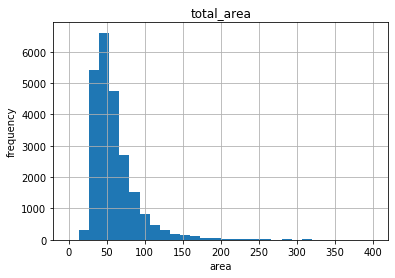

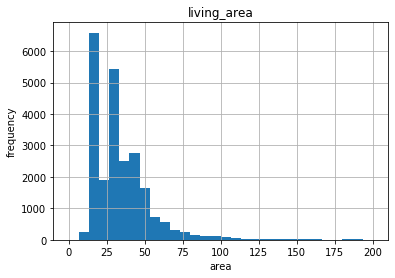

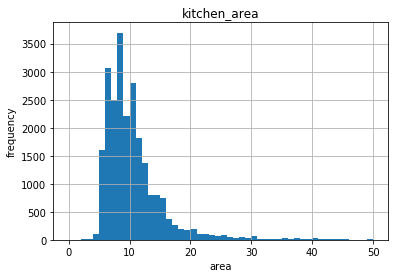

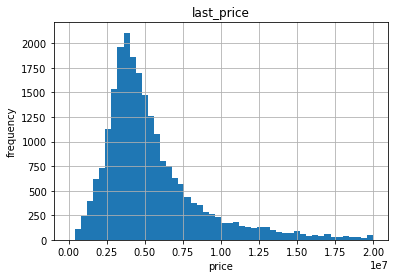

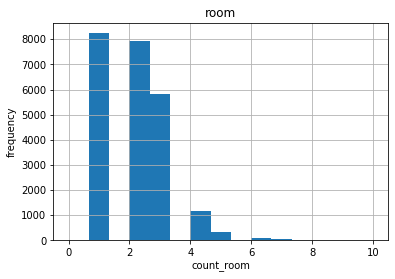

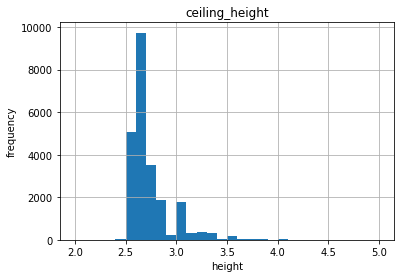

In [ ]:
df['total_area'].hist(bins=30, range=(0,400))
plt.xlabel('area')
plt.ylabel('frequency')
plt.title('total_area')
plt.show()

df['living_area'].hist(bins=30, range=(0,200))
plt.xlabel('area')
plt.ylabel('frequency')
plt.title('living_area')
plt.show()

df['kitchen_area'].hist(bins=50, range=(0,50))
plt.xlabel('area')
plt.ylabel('frequency')
plt.title('kitchen_area')
plt.show()

df['last_price'].hist(bins=50, range=(0,20000000))
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('last_price')
plt.show()

df['rooms'].hist(bins=15, range=(0,10))
plt.xlabel('count_room')
plt.ylabel('frequency')
plt.title('room')
plt.show()

df['ceiling_height'].hist(bins=30, range=(2, 5))
plt.xlabel('height')
plt.ylabel('frequency')
plt.title('ceiling_height')
plt.show()

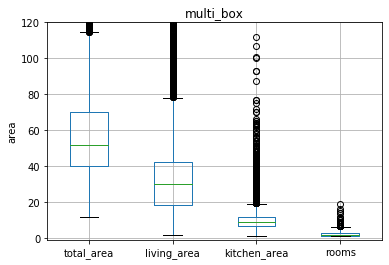

In [ ]:
df.loc[:,['total_area', 'living_area', 'kitchen_area', 'rooms']].boxplot()
plt.ylim(-1,120)
plt.title('multi_box')
plt.ylabel('area')
plt.show()

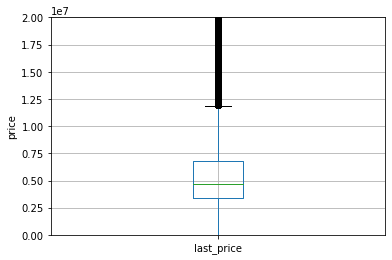

In [ ]:
df.loc[:,['last_price']].boxplot()
plt.ylim(-1,20000000)
plt.ylabel('price')
plt.show()

### Вывод<a id="result4"></a>
Из гистограмм видно:
1. На всех гистограммах просматривается распределение Пуассона;
2. Значения площадей и цены имеют большое кол-во выбросов, как и показал нам метод describe() и boxplot().
3. У жилой площади и площади кухни есть несколько пиковых значений. Скорее всего это продажи типовой застройки в Петербурге.

#### Анализ времени продаж<a id="research2"></a>
    Необходимо:
    - Изучить время продажи квартиры;
    - Построить гистограмму;
    - Посчитать среднее и медиану;
    - сделать выводы о нормальном времени продажи, быстром и долгом.

In [ ]:
df['days_exposition'].describe()

count   20518.00
mean      180.89
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Из таблицы можно сделать вывод:
- Отклонение от средней больше чем сама средняя, что говорит нам о большом размахе данных и большом кол-ве выбросов;
- Среднее в 2 раза больше медианы;
- Основная часть сделок проходит от 45 до 232 дней;

Необходимо исправить ситуацию и понять:
- где у нас быстрые, а где медленные продажи;
- с чем можно расстаться, учитывая долю потери выборки;

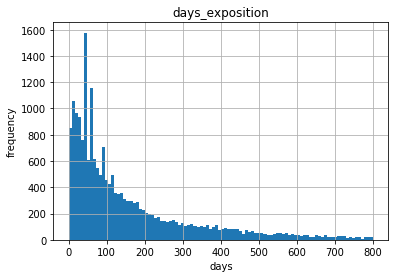

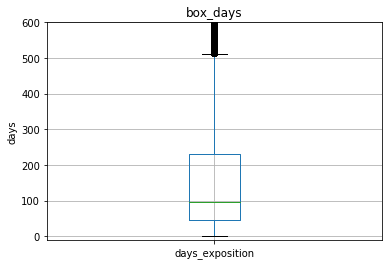

In [ ]:
df['days_exposition'].hist(bins=100, range=(0,800))
plt.xlabel('days')
plt.ylabel('frequency')
plt.title('days_exposition')
plt.show()

df.boxplot(column='days_exposition')
plt.ylim(-10,600)
plt.ylabel('days')
plt.title('box_days')
plt.show()

Исходя и диаграммы размаха видно, что долгие продажи - продажи выше 520 дней.

In [ ]:
# посчитаем долю значений долгих продаж свыше 600 дней.
# Почему 600, а не 520 дней, потому что - это около 6.8% выборки.
len(df.query('days_exposition > 600')) / len(df)
# 5 % - долгих продаж можно убрать, чтобы исправить ситуации с отклонением.

0.05055065614582894

In [ ]:
df['normal_sale'] = df['days_exposition'] > 600
df_normal_sale = df.query('normal_sale == False')
df_normal_sale['days_exposition'].describe()

count   19320.00
mean      139.18
std       137.01
min         1.00
25%        42.00
50%        89.00
75%       195.00
max       600.00
Name: days_exposition, dtype: float64

**Ситуация немного исправилась, отклонение стало ниже средней, но разброс все равно велик.**

In [ ]:
# посчитаем долю значений быстрых продаж меньше недели
len(df.query('days_exposition <= 7')) / len(df)

0.03578210051057007

- 3.5 % - быстрых продаж, но они имеют место быть, если исходить из практики средний срок продажи от 5 до месяца и более;


Посмотрим, что за пики были на гистограмме

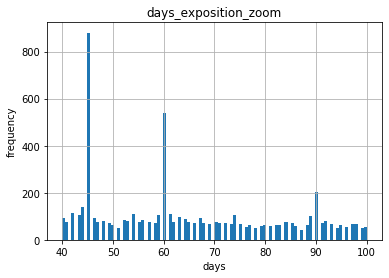

In [ ]:
df_normal_sale['days_exposition'].hist(bins=100, range=(40,100))
plt.xlabel('days')
plt.ylabel('frequency')
plt.title('days_exposition_zoom')
plt.show()

*Пики на 45, 60, 90 днях. Скорее всего КПЭ завязаны на сроки продажи. Риэлтору ставят задачу - 1,5 мес.-> 2 мес.-> 3 мес.-> уволен.*

### Вывод<a id="result5"></a>
- Определили быстрые и медленные продажи;
- Удалили из выборки быстрые продажи выше 600 дней, снизив тем самым отклонение от средней с 219 до 137;
- Более реальные цифры нам показывает медиана - 89 дней (95);
- сейчас основная выборка находится в пределах от 42 до 189 дней (45-232);
- Быстрые продажи убирать не стоит, т.к. они встречаются в реальной жизни;

#### Определение редких и выбивающихся значений<a id="research3"></a>

Ознакомившись с данными в первом разделе, мы выявили несколько логических выбросов

Аномальные значения:
- last_price - 12900 и 763 млн;
- total_area - 0 и 900 кв.м;
- ceiling_height - 1 и 100 м;
- living_area - 2 и 409 квм;
- kitchen_area - ситуация аналогичная.

Начнем с цены:

In [ ]:
df.loc[:,['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','kitchen_area', 'days_exposition']].sort_values(by='last_price', ascending=False).tail()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,days_exposition
16219,450000.00,38.50,2.00,2.65,2.00,24.00,1,7.50,45.00
16274,440000.00,40.00,1.00,2.60,5.00,17.39,1,8.40,45.00
17456,430000.00,30.40,1.00,2.60,2.00,16.00,1,6.00,nan
14911,430000.00,54.00,2.00,2.60,3.00,31.00,3,8.30,44.00
8793,12190.00,109.00,2.00,2.75,25.00,32.00,25,40.50,8.00


Значение 12190 - ошибка, скорее всего вызвана человеческим фактором, либо округлением, т.к. квартира стоит скорее всего 12190 тыс.р., аналогичные квартиры стоят 10 млн -13 млн, заменим это значение, т.к. это не выброс.

In [ ]:
df['last_price']=df['last_price'].replace(12190,12190000)

In [ ]:
df.loc[:,['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','kitchen_area', 'days_exposition']].sort_values(by='last_price', ascending=False).head(10)

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,days_exposition
12971,763000000.00,400.00,7.00,3.36,10.00,250.00,10,37.00,33.00
19540,420000000.00,900.00,12.00,2.80,25.00,409.70,25,112.00,106.00
14706,401300000.00,401.00,5.00,3.36,9.00,204.00,9,24.00,393.00
1436,330000000.00,190.00,3.00,3.50,7.00,95.00,5,40.00,233.00
15651,300000000.00,618.00,7.00,3.40,7.00,258.00,5,70.00,111.00
22831,289238400.00,187.50,2.00,3.37,6.00,63.70,6,30.20,nan
16461,245000000.00,285.70,6.00,3.35,7.00,182.80,4,29.80,249.00
13749,240000000.00,410.00,6.00,3.40,7.00,218.00,7,40.00,199.00
5893,230000000.00,500.00,6.00,3.36,7.00,196.00,7,40.00,50.00
8900,190870000.00,268.00,3.00,3.00,8.00,132.00,7,40.00,901.00


- Исходя из гистограммы распределения попробуем обрезать выбросы выше 15 млн.
- посчитаем долю значений стоимости квартиры выше 15 млн.рублей

In [ ]:
len(df.query('last_price > 15000000')) / len(df)
# 5 % - богатых буратин не много, попращаемся с ними...

0.050803831385290515

In [ ]:
df.loc[:,['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','kitchen_area', 'days_exposition']].sort_values(by='total_area', ascending=False).tail()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,days_exposition
19558,1686000.00,13.20,1.00,2.60,5.00,16.20,1,6.00,19.00
19807,3800000.00,13.00,1.00,2.60,5.00,10.00,3,7.00,9.00
19546,1850000.00,13.00,1.00,3.40,5.00,16.20,2,6.00,24.00
17961,1400000.00,13.00,1.00,2.60,9.00,16.20,1,6.00,410.00
19904,2400000.00,12.00,1.00,2.55,5.00,10.00,2,7.00,200.00


Оказывается таких маленьких студий очень много в Москве и Питере, убирать из выборки нельзя.

In [ ]:
# посчитаем долю значений общей площади выше 150 квм.
len(df.query('total_area > 150')) / len(df)
# 2,3 % - больших квартир в ведро

0.02379847250938858

In [ ]:
# посчитаем долю квартир с аномальными значениями высоты:
# меньше 2,1 м и больше 5 метров
len(df.query('ceiling_height >= 5 or ceiling_height <= 2')) / len(df)

0.0012658761973079033

Создадим новый датафрейм, учтем фильтры аномальных значений, начиная с долгих продаж:

In [ ]:
df_final = df_normal_sale.query('last_price <= 15000000')
df_final = df_final.query('total_area <= 150')
df_final = df_final.query('ceiling_height <= 5')
df_final = df_final.query('ceiling_height >= 2.1')
df_final = df_final.query('living_area < 90')
df_final = df_final.query('kitchen_area < 25')
len(df_final) / len(df)

0.8864931009747247

#### Потеряли 11.4% выборки. Сбросили баласт, летим дальше

In [ ]:
df_final.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_m,Year,ratio_living_area,ratio_kitchen_area
count,21009.00,21009.00,21009.00,21009.00,21009.00,21009.00,21009.00,21009.00,21009.00,21009.00,...,15808.00,15809.00,6655.00,15809.00,7625.00,18271.00,21009.00,21009.00,21009.00,21009.00
mean,9.77,5026267.82,53.83,1.95,2.67,10.82,30.91,5.93,9.47,0.60,...,14836.22,0.56,488.46,0.72,532.23,136.27,93396.53,2017.47,0.57,0.19
std,5.58,2569036.40,19.53,0.90,0.19,6.65,13.64,4.92,3.32,0.95,...,8454.64,0.77,327.84,0.90,276.72,135.15,30907.11,0.95,0.10,0.07
min,0.00,430000.00,12.00,1.00,2.20,1.00,2.00,1.00,1.30,0.00,...,208.00,0.00,1.00,0.00,13.00,1.00,7962.96,2014.00,0.04,0.04
25%,6.00,3330000.00,39.00,1.00,2.60,5.00,18.10,2.00,7.00,0.00,...,10489.25,0.00,289.00,0.00,316.00,42.00,75235.11,2017.00,0.50,0.14
50%,9.00,4450000.00,50.00,2.00,2.60,9.00,29.40,4.00,8.93,0.00,...,13513.50,0.00,456.00,0.00,522.00,85.00,93421.05,2018.00,0.57,0.17
75%,14.00,6100000.00,64.30,3.00,2.71,16.00,40.00,8.00,11.00,1.00,...,16622.00,1.00,613.00,1.00,744.00,190.00,110810.81,2018.00,0.64,0.23
max,50.00,15000000.00,150.00,7.00,5.00,60.00,89.90,33.00,24.90,5.00,...,65952.00,3.00,3190.00,3.00,1344.00,600.00,387096.77,2019.00,1.25,0.74


In [ ]:
reserch1_1 = df_final.loc[:,['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height']]

**Посмотрим на гистограммы распределения по фильтрованным данным**

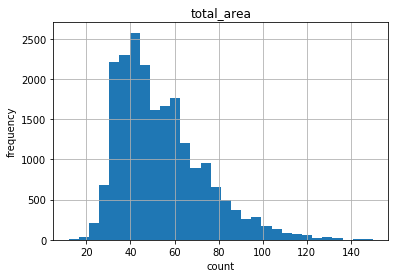

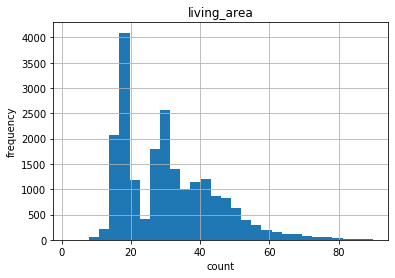

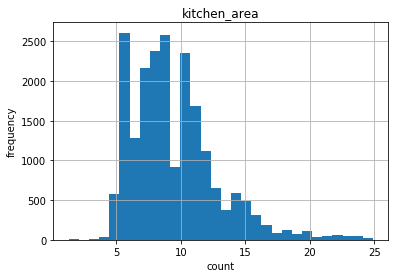

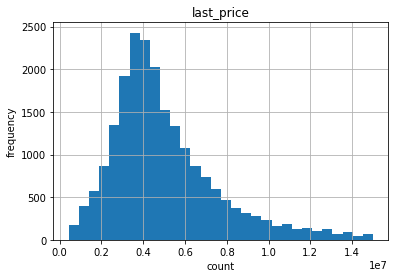

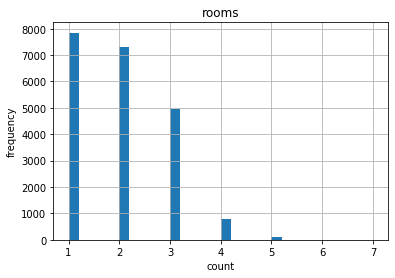

In [ ]:
def show_me_hist(df, i):
    df[df.columns.values[i]].hist(bins=30)
    plt.xlabel('count')
    plt.ylabel('frequency')
    plt.title(df.columns.values[i])
    plt.show()

for i in range(5):
    show_me_hist(reserch1_1, i)

**Сравним с изначальными**

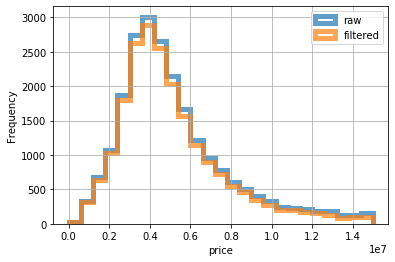

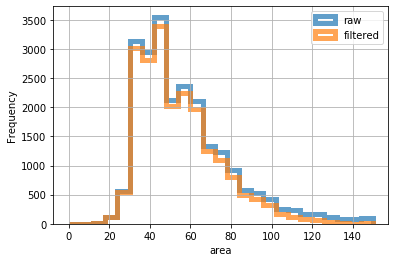

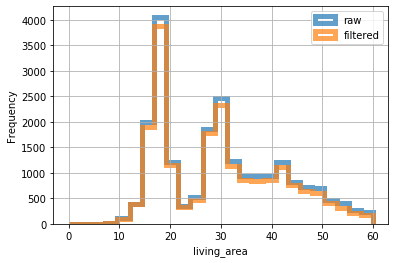

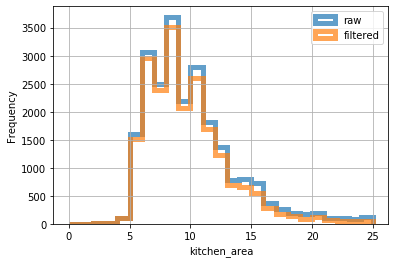

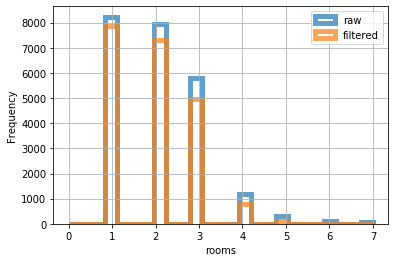

In [ ]:
ax = reserch1.plot(kind='hist', y='last_price', histtype='step', range=(0, 15000000), bins=25, linewidth=5, alpha=0.7, label='raw')
reserch1_1.plot(kind='hist', y='last_price', histtype='step', range=(0, 15000000), bins=25, linewidth=5, alpha=0.7, label='filtered', ax=ax, grid=True, legend=True)
plt.xlabel('price')
plt.show()

ax = reserch1.plot(kind='hist', y='total_area', histtype='step', range=(0, 150), bins=25, linewidth=5, alpha=0.7, label='raw')
reserch1_1.plot(kind='hist', y='total_area', histtype='step', range=(0, 150), bins=25, linewidth=5, alpha=0.7, label='filtered', ax=ax, grid=True, legend=True)
plt.xlabel('area')
plt.show()

ax = reserch1.plot(kind='hist', y='living_area', histtype='step', range=(0, 60), bins=25, linewidth=5, alpha=0.7, label='raw')
reserch1_1.plot(kind='hist', y='living_area', histtype='step', range=(0, 60), bins=25, linewidth=5, alpha=0.7, label='filtered', ax=ax, grid=True, legend=True)
plt.xlabel('living_area')
plt.show()

ax = reserch1.plot(kind='hist', y='kitchen_area', histtype='step', range=(0, 25), bins=25, linewidth=5, alpha=0.7, label='raw')
reserch1_1.plot(kind='hist', y='kitchen_area', histtype='step', range=(0, 25), bins=25, linewidth=5, alpha=0.7, label='filtered', ax=ax, grid=True, legend=True)
plt.xlabel('kitchen_area')
plt.show()

ax = reserch1.plot(kind='hist', y='rooms', histtype='step', range=(0, 7), bins=25, linewidth=5, alpha=0.7, label='raw')
reserch1_1.plot(kind='hist', y='rooms', histtype='step', range=(0, 7), bins=25, linewidth=5, alpha=0.7, label='filtered', ax=ax, grid=True, legend=True)
plt.xlabel('rooms')
plt.show()

- Распределение Пуассона - теперь похоже на расспределение Пуассона. Распределение Цены - красивое как Эверест.

In [ ]:
# создали новый столбец с группами по общей площади
df_final['group_total_area'] = pd.cut(df_final['total_area'],[0,30,40,50,60,70,80,100,150])
#df_final['group_total_area'].value_counts() # проверли

In [ ]:
# Разобъем цены на группы, для сравнения цены со скоростью продажи 
df_final['group_last_price'] = pd.cut(df_final['last_price'],
[400000,2000000,3000000,4000000,5000000,7000000,10000000,15000000])
#df_final['group_last_price'].value_counts() # проверим, примерно одинаковая выборка, 

In [ ]:
# Разобъем дни проддажи на группы, для сравнения с ценой и площадью 
df_final['group_days_exposition'] = pd.cut(df_final['days_exposition'],
[1,14,30,45,60,75,90,180,365,600])
# df_final['group_days_exposition'].value_counts() # проверим, примерно одинаковая выборка, 

In [ ]:
df_final.pivot_table(index='group_last_price', columns = 'group_total_area', values = 'days_exposition', aggfunc = 'median')

group_total_area,"(0, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 100]","(100, 150]"
group_last_price,,,,,,,,
"(400000, 2000000]",87.00,82.50,87.00,80.00,107.00,118.00,122.50,95.50
"(2000000, 3000000]",61.50,75.00,90.50,93.00,109.00,126.00,467.00,nan
"(3000000, 4000000]",55.00,71.00,74.00,92.00,84.00,94.50,121.00,133.00
"(4000000, 5000000]",58.50,65.00,80.00,89.00,107.00,107.00,91.00,45.00
"(5000000, 7000000]",36.00,80.50,82.50,75.00,98.00,89.50,123.50,180.50
"(7000000, 10000000]",2.00,68.50,77.00,60.00,85.00,108.50,118.00,140.00
"(10000000, 15000000]",nan,90.00,120.00,90.00,110.00,90.00,103.50,151.00


Странные значения: 
- быстрые продажа квартиры от 0 до 30 квм за 7-10 млн. - наверно какое-то элитное жилье для любителей пожить в тесноте, либо какая-то махинация.
- осободолгая продажа за 1,5 года 80-100 квм всего за 2-3 млн - скорее всего соседи плохие.

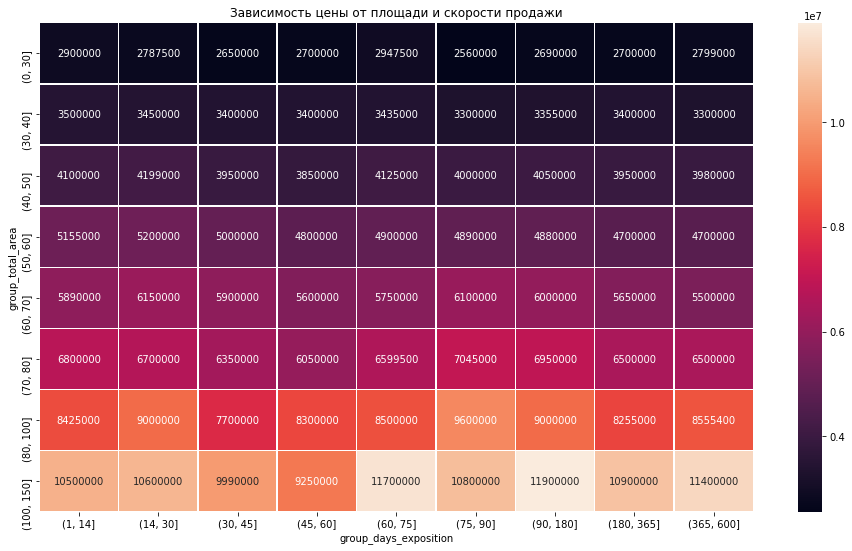

In [ ]:
import seaborn as sns
f, ax= plt.subplots(figsize=(16, 9))
plt.title('Зависимость цены от площади и скорости продажи')
sns.heatmap(df_final.pivot_table(index='group_total_area', columns = 'group_days_exposition', values = 'last_price', aggfunc = 'median'), annot=True, fmt='.0f',linewidths=.5, ax=ax)


### Вывод<a id="result6"></a>
- Очистили данные от логических выбросов;
- Очистили данные от выбросов, выявленных по диаграмме размаха;
- Лишились 11,4% некрасивых данных;
- Нормализовали рассеивание данных;
- Снизили разницу между средним и медианным значением.

#### Установление факторов влияющих на стоимость квартиры<a id="research4"></a>
    - Построим зависимость стоимости квартиры с площадью, числом комнат, удалённостью от центра;
    - Изучим зависимость цены от того, на каком этаже расположена квартира;
    - Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [ ]:
# Проведем предварительные расчеты
corr1 = df_final.loc[:, ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'cityCenters_nearest']]

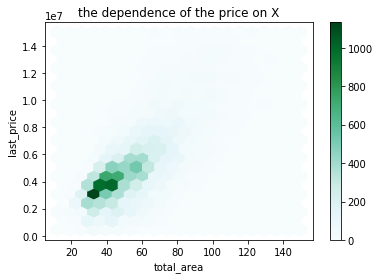

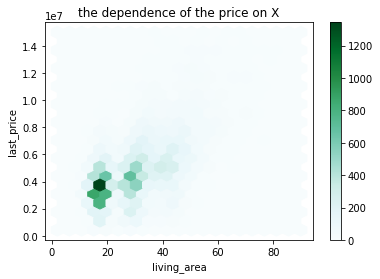

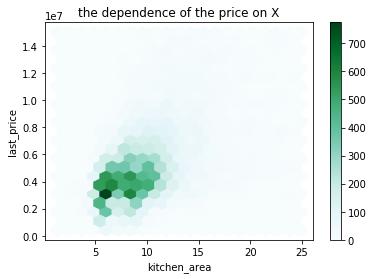

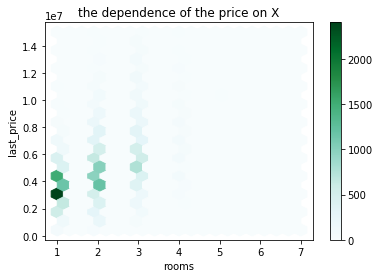

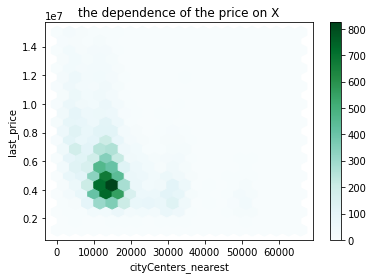

In [ ]:
def show_me_skatter(df, i):
    df.plot(x=df.columns.values[i+1], y=df.columns.values[0], kind='hexbin', gridsize=20, sharex=False)
    plt.title('the dependence of the price on X')
    plt.show()
for i in range(5):
    show_me_skatter(corr1, i)

1. График цены от площади - Основное пятно зависимости 25-60 квм. - стоимость от 2 до 6 млн. Ликвидней всего квартиры в зоне 35-45 квм от 3 до 5 млн;
2. График цены от жил.площади - жилая площадь распределилась на 2 пятна - 18-20 квм и 25-30, стоимость от 2 до 5 млн;
3. График цены от кухни - имеет больший разброс по значениям, т.к. скорее всего связано с увеличением или уменьшением размеров кухни, а вот жилую площадь уже не увеличишь. стоимость 2-6 млн;
4. График цены от комнат - как и ожидалось - 1-ушки - самые ликвидные, потом 2 и 3 комнатные квартиры. Стоимости - 1-к - 2-5 млн, 2-3к - от 2 до 8 млн;
5. График цены от удаленности от центра - основная выборка ликвидных квартир в 9 до 19 км удаленности от центра (на Яндекс.Картах - это Александровский столп, или Эрмитаж). Основная цена от 3 до 8 млн. Есть выборка по-меньше до 9 км. цены от 6 до 15 млн. Скорее всего где-то тут граница центра.

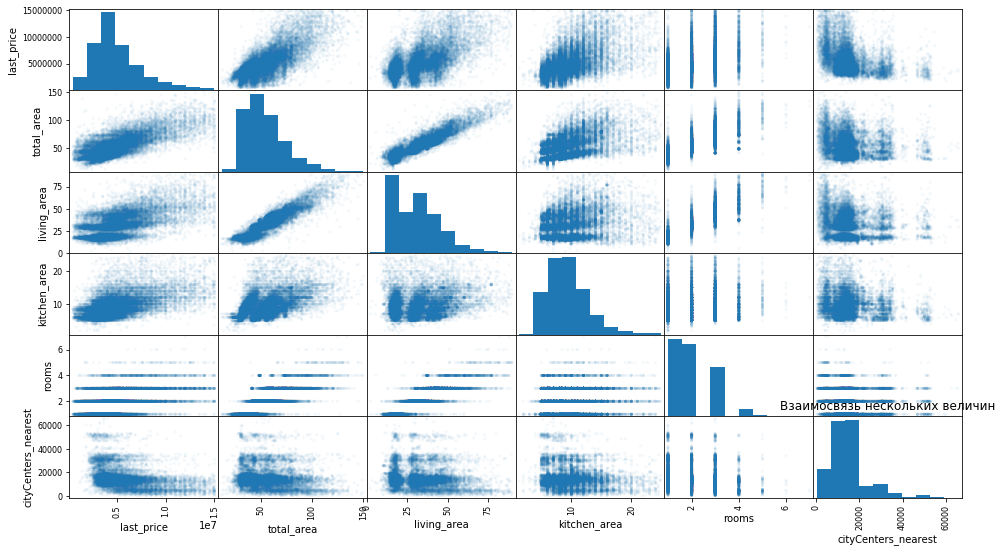

In [ ]:
pd.plotting.scatter_matrix(corr1, figsize=(16, 9), alpha=0.05)
plt.title('Взаимосвязь нескольких величин')
plt.show()

- Цена более-менее зависит от общей площади (тут логично);
- Остальные площади при минимальных значениях имеют зависимость, при увеличении площади, зависимость пропадает;
- между общей и жилой площадью есть прямая зависимось;
- в остальных парах зависимостей нет.

In [ ]:
corr1.corr()

,last_price,total_area,living_area,kitchen_area,rooms,cityCenters_nearest
last_price,1.00,0.73,0.61,0.53,0.47,-0.35
total_area,0.73,1.00,0.92,0.48,0.80,-0.16
living_area,0.61,0.92,1.00,0.22,0.90,-0.15
kitchen_area,0.53,0.48,0.22,1.00,0.09,-0.13
rooms,0.47,0.80,0.90,0.09,1.00,-0.10
cityCenters_nearest,-0.35,-0.16,-0.15,-0.13,-0.10,1.00


- Цифры подтверждают наши выводы:
 - Четкая взаимосвязь цены и площади, кол-ва комнат от общей площади, и отрицательная взаимозависимость между ценой и отдаленностью от центра.

**Создадим несколько экспериментальных сводных таблиц для выявления связей**

In [ ]:
df_final['group_living_area'] = pd.cut(df_final['living_area'],
[12,18,25,30,40,50,90])
#df_final['group_living_area'].value_counts() # проверим, примерно одинаковая выборка, 

In [ ]:
df_final['group_kitchen_area'] = pd.cut(df_final['kitchen_area'],
[1,6,7,8,9,10,12,15,25])
#df_final['group_kitchen_area'].value_counts() # проверим, примерно одинаковая выборка, 

In [ ]:
df_final['group_rooms'] = pd.cut(df_final['rooms'],[1,2,3,4,5,7])
#df_final['group_rooms'].value_counts() # проверим, примерно одинаковая выборка, 

In [ ]:
df_final['group_cityCenters_nearest'] = pd.cut(df_final['cityCenters_nearest'],
[0,4000, 8000, 10000,12000,15000,20000,30000,100000])
#df_final['group_cityCenters_nearest'].value_counts() # проверим, примерно одинаковая выборка, 

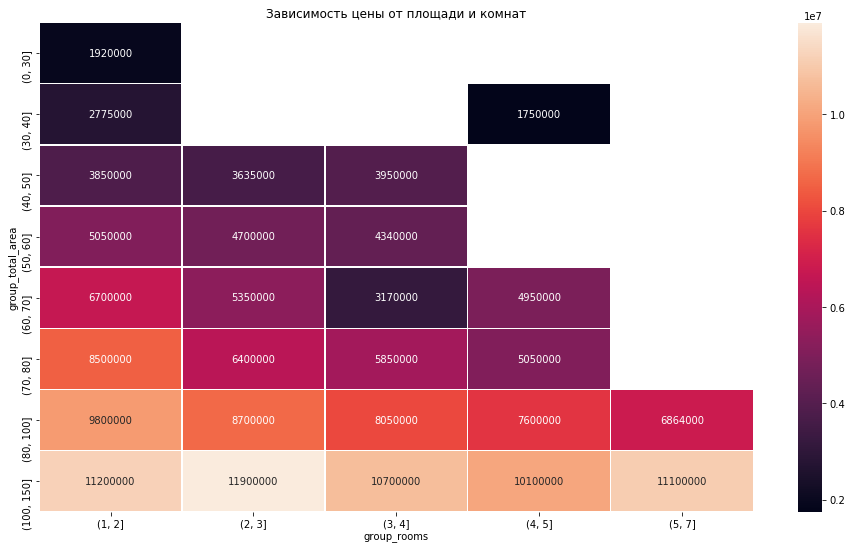

In [ ]:
import seaborn as sns
f, ax= plt.subplots(figsize=(16, 9))
plt.title('Зависимость цены от площади и комнат')
sns.heatmap(df_final.pivot_table(index='group_total_area', columns = 'group_rooms', values = 'last_price', aggfunc = 'median'), annot=True, fmt='.0f',linewidths=.5, ax=ax)

*1,75 млн за квартиру 30-40 квм, но как уместили туда 4-5 комнат. - какой-то не удаленный выброс*

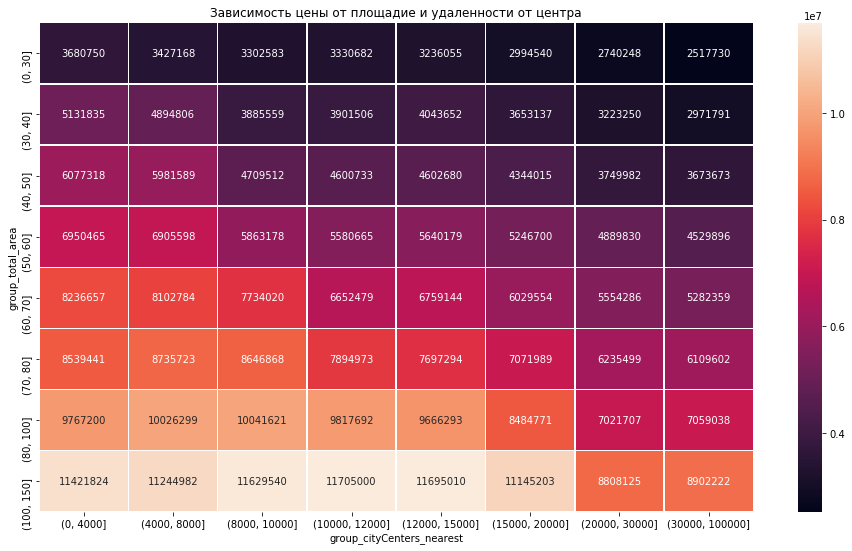

In [ ]:
import seaborn as sns
f, ax= plt.subplots(figsize=(16, 9))
plt.title('Зависимость цены от площади и удаленности от центра')
sns.heatmap(df_final.pivot_table(index='group_total_area', columns = 'group_cityCenters_nearest', values = 'last_price', aggfunc = 'mean'), annot=True, fmt='.0f',linewidths=.5, ax=ax)

**Выводы:**
- Основная выборка 30-60 квм -  цены меняются между 8 и 10 км, Центр где-то рядом.

**Изучим зависимость цены от того, на каком этаже расположена квартира;**

In [ ]:
corr2 = df_final.loc[:,['last_price', 'group_floor']]
corr2.groupby('group_floor').agg({'last_price':['count','median']})

last_price           
                 count     median
group_floor                      
другой           15429 4600000.00
первый            2653 3800000.00
последний         2927 4100000.00

**Вывод**:
- Никто не хочет жить на первом и последем этаже, на первом - могут ограбить, на последнем вечно течет крыша.

**Также изучим зависимость от даты размещения: дня недели, месяца и года.**

In [ ]:
corr3=df_final.loc[:,['last_price', 'weekday', 'mounth', 'Year']]

In [ ]:
corr3.pivot_table(index='weekday', values='last_price', aggfunc = ['count','median'])

,count,median
,last_price,last_price
weekday,,
Friday,3603,4400000.00
Monday,3192,4480000.00
Saturday,1729,4400000.00
Sunday,1523,4450000.00
Thursday,3739,4400000.00
Tuesday,3720,4500000.00
Wednesday,3503,4500000.00


**Вывод**:
- Средняя цена примерно одинаковая, меньше всего покупают в выходные дни.

In [ ]:
corr3.pivot_table(index='mounth', values='last_price', aggfunc = ['count','mean']).sort_values(by=('mean','last_price'), ascending = False)

,count,mean
,last_price,last_price
mounth,,
April,2142,5141652.16
September,1770,5134567.05
November,2132,5093832.08
August,1575,5047212.81
February,2354,5019887.66
July,1488,5011672.60
March,2248,5003652.98
December,1408,4994998.28


**Вывод**:
- Продаем - в апреле, сентябре и ноябре;
- Покупаем - в октябре, мае и июне.

In [ ]:
corr3.pivot_table(index='Year', values='last_price', aggfunc = ['count','mean'])

,count,mean
,last_price,last_price
Year,,
2014,32,7175534.88
2015,584,5283761.72
2016,2171,4979960.05
2017,7508,4963753.40
2018,8047,4968600.12
2019,2667,5331776.42


- 2014 - 2015 год - маленькая выборка;
- 2016-2019 год - видим как повышается цена! Инфляция, подумал Штирлиц!

#### Вывод<a id="result7"></a>
1. Цены в большей степени зависит от общей площади - Основное пятно зависимости 25-60 квм. - стоимость от 2 до 6 млн. Ликвидней всего квартиры в зоне 35-45 квм от 3 до 5 млн;
2. 1-ушки - самые ликвидные, потом 2 и 3 комнатные квартиры. Стоимости - 1-к - 2-5 млн, 2-3к - от 2 до 8 млн;
5. Самые ликвидные квартиры расположились в 9 до 19 км удаленности от центра. Основная цена от 3 до 8 млн. Чем ближе к 0, тем дороже цены, но и менее ликвидней.
6. Корреляция: 
    - Цена зависит от общей площади;
    - Остальные площади при минимальных значениях имеют зависимость, при увеличении площади, зависимость пропадает;
    - между общей и жилой площадью есть прямая зависимось;
    - в остальных парах зависимостей нет;
    - между ценой и удаленностю от центра - обратная;
7. Дисконт имеют первый и последний этаж: на первом - могут ограбить, на последнем вечно течет крыша;
8. Зависимость от даты:
    - День недели - Средняя цена примерно одинаковая, меньше всего покупают в выходные дни.
    - Месяц: Продаем - в апреле, сентябре и ноябре; Покупаем - в октябре, мае и июне.
    - Год: 2014 - 2015 год - маленькая выборка; 2016-2019 год - видим как повышается цена! Инфляция, подумал Штирлиц!

#### Определение максимальной и минимальной стоимости жилья в Топ-10 населённых пунктов с наибольшим числом объявлений.<a id="research5"></a>

In [ ]:
# Выделим Топ-10
top_10 = df_final['locality_name'].value_counts().head(10)
df_locality = df_final.query('locality_name in @top_10.index')
df_locality.pivot_table(index='locality_name', values='price_square_m', aggfunc = ['mean']).sort_values(by=('mean', 'price_square_m'), ascending=False)

,mean
,price_square_m
locality_name,
Санкт-Петербург,107161.67
Пушкин,100577.61
деревня Кудрово,92854.51
посёлок Парголово,90166.96
посёлок Мурино,85892.95
посёлок Шушары,78699.86
Колпино,75271.72
Гатчина,68829.82


#### Вывод<a id="result8"></a>
1. Самый дорогой квадратный метр в Санкт-Петербурге;
2. Самый дешевый в Выборге.
3. С точки зрения статистики и оптимальных закупок надо покупать квартиру в Мурино или Шушары:)

**Определение границ центральной зоны Питера**<a id="research6"></a>
- создадим столбец с расстоянием до центра в километрах;
- посчитаем среднюю цену для каждого километра;
- построим график как цена зависит от удалённости от центра;
- определим границу, где график сильно меняется — это и будет центральная зона.

In [ ]:
#Подготовительные мероприятия и расчеты: только Санкт-Петербург и только километры.
mean_price_km = df_final.loc[:,['last_price','total_area','rooms', 'group_floor','ceiling_height','cityCenters_nearest','locality_name', 'weekday', 'mounth', 'Year', 'price_square_m', 'group_total_area']]
mean_price_km = mean_price_km.query('locality_name == "Санкт-Петербург"')
mean_price_km['round_cC_n'] = (mean_price_km['cityCenters_nearest'] / 1000).round(0)
# mean_price_km.head() # проверка

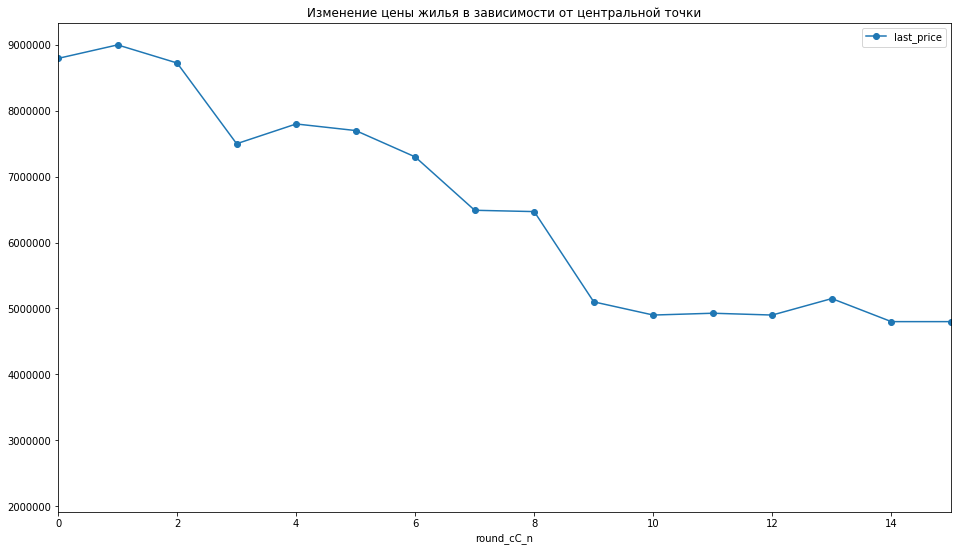

In [ ]:
mean_price_km.pivot_table(index='round_cC_n', values='last_price', aggfunc='median').plot(style='o-', figsize=(16,9))
plt.title('Изменение цены жилья в зависимости от центральной точки')
plt.xlim(0,15)
plt.show()

#### Вывод<a id="result9"></a>
1. Центр - до 8 км;
2. Если глянуть на Яндекс.Карты, и воспользоваться линейкой наше суждение подтверждается. Центр - Эрмитаж, Александровский столп.

#### Сравнение центра Санкт-Петербурга и города в целом.<a id="research7"></a>
 - Проанализируем и изучим следующие параметры: площадь, цена, число комнат, высота потолков;
 - Выделим факторы, влиябщие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
 - Сделаем выводы в сравнении с городом в целом.

In [ ]:
# Проведем предварительные расчеты
df_spb_c = mean_price_km.loc[:, ['last_price', 'total_area', 'rooms','ceiling_height', 'round_cC_n']]
# Проведем срез по центральной части города
df_spb_c = df_spb_c.query('round_cC_n <= 8')
df_spb_c.describe()

,last_price,total_area,rooms,ceiling_height,round_cC_n
count,2789.00,2789.00,2789.00,2789.00,2789.00
mean,7867585.87,67.32,2.36,2.89,5.15
std,2846911.31,24.05,1.00,0.32,1.97
min,1600000.00,12.00,1.00,2.40,0.00
25%,5772000.00,47.70,2.00,2.60,4.00
50%,7500000.00,65.00,2.00,2.80,5.00
75%,9600000.00,83.70,3.00,3.00,7.00
max,15000000.00,150.00,7.00,4.80,8.00


In [ ]:
# Данные всего города по цене, общей площади, комнатам и высоте потолка
all_city = mean_price_km.loc[:,['last_price', 'total_area', 'rooms', 'ceiling_height']]
all_city.describe()

,last_price,total_area,rooms,ceiling_height
count,13547.00,13547.00,13547.00,13547.00
mean,5925790.56,55.72,2.01,2.69
std,2542438.34,20.47,0.92,0.21
min,1190000.00,12.00,1.00,2.26
25%,4100000.00,40.20,1.00,2.60
50%,5200000.00,51.00,2.00,2.60
75%,7000000.00,67.00,3.00,2.75
max,15000000.00,150.00,7.00,4.80


Из таблиц можно сделать выводы:
1. Цена продажи - средняя и медианное значение увеличилось - 48%, Минимальная цена выросла на 37%, основная часть квартир в пределах от 5,7 до 9,6 млн;
2. Общая площадь - в центре квартиры побольше на 30% по площади;
3. Кол-во комнат и высота потолков - отклонение незначительное, немного выше потолки.
Построим графики рассеивания и сравним корреляцию:

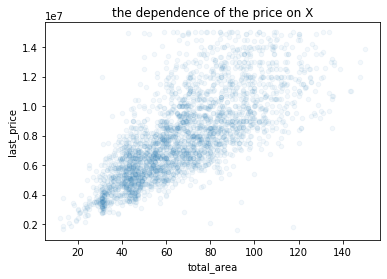

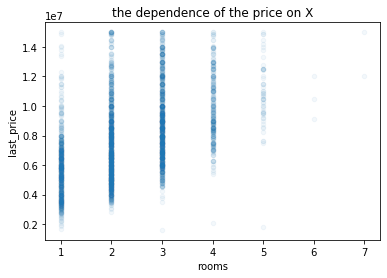

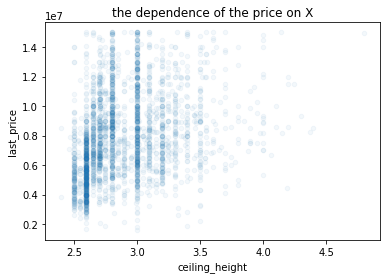

In [ ]:
def show_me_skatter(df, i):
    df.plot(x=df.columns.values[i+1], y=df.columns.values[0], kind='scatter', alpha=0.05)
    plt.title('the dependence of the price on X')
    plt.show()
for i in range(3):
    show_me_skatter(df_spb_c, i)

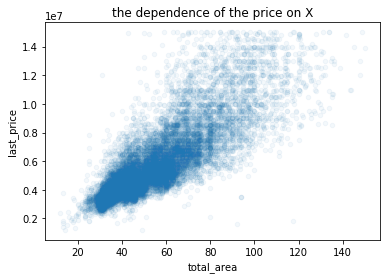

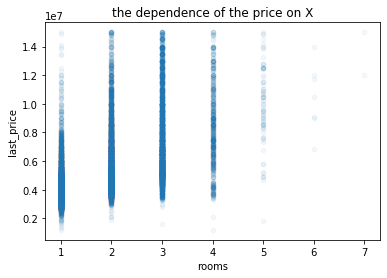

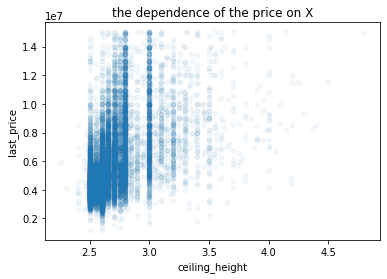

In [ ]:
def show_me_skatter(df, i):
    df.plot(x=df.columns.values[i+1], y=df.columns.values[0], kind='scatter', alpha=0.05)
    plt.title('the dependence of the price on X')
    plt.show()
for i in range(3):
    show_me_skatter(all_city, i)

In [ ]:
df_spb_c.corr()

,last_price,total_area,rooms,ceiling_height,round_cC_n
last_price,1.00,0.73,0.48,0.31,-0.20
total_area,0.73,1.00,0.81,0.38,-0.23
rooms,0.48,0.81,1.00,0.29,-0.21
ceiling_height,0.31,0.38,0.29,1.00,-0.30
round_cC_n,-0.20,-0.23,-0.21,-0.30,1.00


In [ ]:
all_city.corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.00,0.81,0.53,0.48
total_area,0.81,1.00,0.80,0.44
rooms,0.53,0.80,1.00,0.23
ceiling_height,0.48,0.44,0.23,1.00


**Выводы**
- В центре города зависимость цены от других факторов снижается.

 - **Изучим зависимость цены от того, на каком этаже расположена квартира и сравним со всем городом**

In [ ]:
df_spb_c = mean_price_km.loc[:,['last_price','rooms','group_floor','round_cC_n','weekday', 'mounth', 'Year',]]
df_spb_c = df_spb_c.query('round_cC_n <= 8')
floor_center=df_spb_c.groupby('group_floor').agg({'last_price':['count','median']})
floor_center.columns=['count','mean_price']
floor_all_city=mean_price_km.groupby('group_floor').agg({'last_price':['count','median']})
floor_all_city.columns=['count','mean_price']
floor_center.merge(floor_all_city, on='group_floor', how='left', suffixes=('_center', '_all_city')).sort_values(by='mean_price_center', ascending=False) 

,count_center,mean_price_center,count_all_city,mean_price_all_city
group_floor,,,,
другой,1966,7701725.50,10519,5300000.00
последний,460,7500000.00,1597,5100000.00
первый,363,5950000.00,1431,4700000.00


**Вывод**
1. Как и везде на первом этаже жить мало кто хочет, поэтому цена имеет ощутимый дисконт;
2. Но на последнем этаже в центре города открываются красивые виды, можно поставить тазик под капли, и наслаждаться видом из окна. Цена не намного ниже других этажей.

In [ ]:
nearest_center = df_spb_c.pivot_table(index='round_cC_n', values='last_price', aggfunc = ['count','median'])
nearest_center.columns=['count','mean_price']
nearest_all_city = mean_price_km.pivot_table(index='round_cC_n', values='last_price', aggfunc = ['count','median'])
nearest_all_city.columns=['count','mean_price']
nearest_all_city.merge(nearest_center, on='round_cC_n', how='left', suffixes=('_center', '_all_city'))

,count_center,mean_price_center,count_all_city,mean_price_all_city
round_cC_n,,,,
0.00,12,8795000.00,12.00,8795000.00
1.00,104,9000000.00,104.00,9000000.00
2.00,184,8725000.00,184.00,8725000.00
3.00,249,7500000.00,249.00,7500000.00
4.00,466,7800000.00,466.00,7800000.00
5.00,590,7700000.00,590.00,7700000.00
6.00,426,7300000.00,426.00,7300000.00
7.00,295,6490000.00,295.00,6490000.00
8.00,463,6470000.00,463.00,6470000.00


- Разница в цене от центра до его края 2 млн рублей.

**Также изучим зависимость от даты размещения: дня недели, месяца и года**

In [ ]:
weekd_center = df_spb_c.pivot_table(index='weekday', values='last_price', aggfunc = 'mean')
weekd_center.columns=['mean_price']
weekd_all_city = mean_price_km.pivot_table(index='weekday', values='last_price', aggfunc = 'mean')
weekd_all_city.columns=['mean_price']
weekd_center.merge(weekd_all_city, on='weekday', how='left', suffixes=('_center', '_all_city')).sort_values(by='mean_price_center', ascending=False)

,mean_price_center,mean_price_all_city
weekday,,
Sunday,8172936.22,5954946.01
Friday,7916980.49,5888980.35
Wednesday,7891443.54,5894616.42
Tuesday,7862820.26,5976911.32
Monday,7830608.68,5891151.53
Saturday,7819584.70,5901424.15
Thursday,7761474.53,5967869.58


1. В центре лучше продавать квартиру в воскресенье;
2. В остальных случаях в четверг (понедельник день тяжелый, вторник-посмотрели квартиру, среда - собрали деньги, четверг - купили). В центре выбирают дольше, т.к. корреляция с другими факторами снижена:)

In [ ]:
mounth_center = df_spb_c.pivot_table(index='mounth', values='last_price', aggfunc = 'mean')
mounth_center.columns=['mean_price']
mounth_all_city = mean_price_km.pivot_table(index='mounth', values='last_price', aggfunc = 'mean')
mounth_all_city.columns=['mean_price']
mounth_center.merge(mounth_all_city, on='mounth', how='left', suffixes=('_center', '_all_city')).sort_values(by='mean_price_all_city', ascending=False)

,mean_price_center,mean_price_all_city
mounth,,
September,8307952.91,6064896.01
December,7343786.74,6011241.67
April,7824437.84,5989230.34
January,7821718.80,5972734.94
November,8056352.26,5959139.92
March,7974467.76,5959125.59
February,7937701.27,5957718.73
August,7860342.51,5884946.17
July,7879325.97,5852980.21


1. Продавать в центре квартиру(если она у Вас есть) нужно в сентябре, ноябре и марте (сентябрь, ноябрь - студенты, а вот март...);
2. Покупать лучше в июне, октябре, декабре.
3. Если вы хотите район потише, то июне октябре, мае
4. А продать в тихом районе лучше - в сентябре, ноябре и апреле.

In [ ]:
Year_center = df_spb_c.pivot_table(index='Year', values='last_price', aggfunc = ['count','mean'])
Year_center.columns=['count', 'mean_price']
Year_all_city = mean_price_km.pivot_table(index='Year', values='last_price', aggfunc = ['count','mean'])
Year_all_city.columns=['count','mean_price']
Year_center.merge(Year_all_city, on='Year', how='left', suffixes=('_center', '_all_city'))

,count_center,mean_price_center,count_all_city,mean_price_all_city
Year,,,,
2014,7,9717946.57,22,8683050.73
2015,117,8042174.09,401,6043987.31
2016,329,7893717.95,1430,5805663.43
2017,1054,7830378.74,4925,5794153.06
2018,968,7806136.95,4965,5958472.50
2019,314,8048229.43,1804,6230543.33


1. В Питере - инфляция!
2. В Центре - дефляция!
3. 2019 год - по центру маленькая выборка.

#### Вывод<a id="result10"></a>
1. Цена продажи квартиры в центре отличается на 48%;
2. Общая площадь в центре больше на 30%;
3. В центре Питера зависимость цены от площади и других факторов снижается;
4. Как и везде квартиры на первом этаже менее ликвидны, поэтому цена имеет ощутимый дисконт;
5. Но в центре последний этаж пользуется спросом, чем в городе в целом, красивый вид из окна делает свое дело.
6. Продавать квартиру в центре нужно в воскресенье в сентябре или ноябре;
7. Покупать в четверг в июне, октябре.
8. По остальному городу - продавать лучше в четверг в сентябре или ноябре;
9. Покупать в пятницу в июне, октябре.

### Шаг 5. Общий вывод<a id="total_result"></a> 

1. Подготовили данные для создания автоматизированной системы определения рыночной стоимости квартиры в Санкт-Петербурге и в других населенных пунктах;
2. Выявлено следующее:
    - цена в большей степени коррелирует с общей площадью и удаленность от центра города;
    - сравнивать в одной системе все города нельзя, т.к. будет уменьшение цены по квратирам в СПБ и увеличение по квартирам в других городах (в Выборге стоимость квм в 2 раза ниже), поэтому необходима разработка систем в зависимости от населенного пункта;
    - В выборе этажей люди оперируют правилом:"главное, чтобы не первый этаж";
    - При покупке и продаже квартиры необходимо учитывать и сезон: Осень - цены дорожают, Весна - дешевеют.
    - Кол-во комнат, высота потолков, площадь кухни влиют, но не в такой степени как общая площадь.
3. Основную таблицу для определения рыночной стоимости квартир в Санкт-Петербурге построим по лучшей зависимости цены от общей площади и удаленности от центра города:

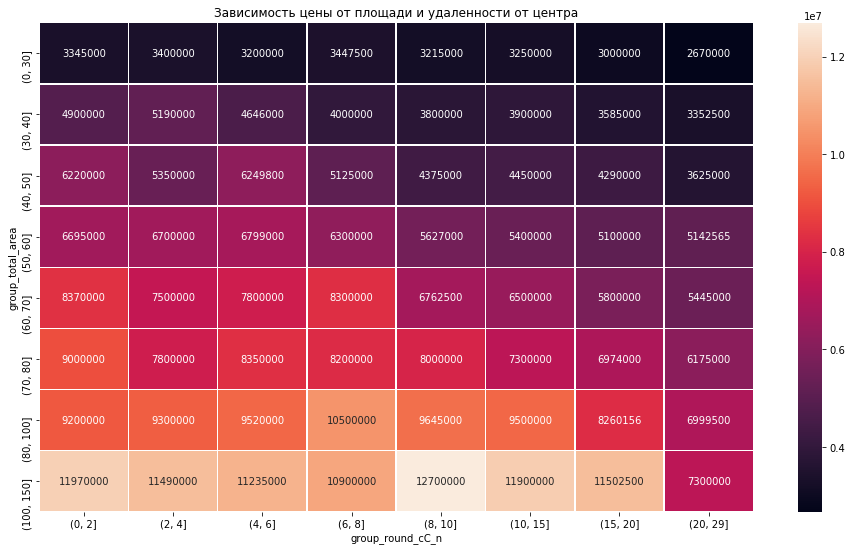

In [ ]:
mean_price_km['group_round_cC_n'] = pd.cut(mean_price_km['round_cC_n'],
[0,2,4,6,8,10,15,20,29])
df_target_price = mean_price_km.loc[:, ['last_price', 'group_total_area', 'group_round_cC_n']]

f, ax= plt.subplots(figsize=(16, 9))
plt.title('Зависимость цены от площади и удаленности от центра')
sns.heatmap(df_target_price.pivot_table(index='group_total_area', columns='group_round_cC_n', values='last_price', aggfunc = 'median'), annot=True, fmt='.0f',linewidths=.5, ax=ax)